<a href="https://colab.research.google.com/github/shivansh9770/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import warnings
warnings.filterwarnings('ignore')

Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing sales data as Sales_df

In [3]:
sales_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT REGRESSION/Rossmann Stores Data.csv')

Exploring data in sales_df

In [4]:
sales_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [5]:
sales_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
print('NO of rows = '+ str(sales_df.shape[0]))
print('NO of columns = '+ str(sales_df.shape[1]))

NO of rows = 1017209
NO of columns = 9


In [ ]:
# exploring Target variable (Sales)
sales_df['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

Sales is continuous variable 

Now deleting rows from the column Open which have value 0 because when store is closed no sales could be done

**to remove closed day data**
where open==0 

In [8]:
sales_df.drop(sales_df.index[sales_df['Open'] == 0], inplace = True)

Now lets delete the column open because all rows contains (open=1) now




In [ ]:
sales_df.drop(columns=['Open'],inplace=True)

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


All the columns are int type except Date and State Holiday and there are no null values

Date and StateHoliday are object type so lets explore this columns

In [12]:
#let us see value counts of StateHoliday 
sales_df['StateHoliday'].value_counts()

0    731342
0    112140
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

We could see StateHoliday is showing 0 two times means it  would also be in string type

In [13]:
#let us check
sales_df[sales_df['StateHoliday']=='0']

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016090,1111,3,2013-01-02,5097,505,0,0,1
1016091,1112,3,2013-01-02,10797,892,0,0,1
1016092,1113,3,2013-01-02,6218,753,0,0,1
1016093,1114,3,2013-01-02,20642,3401,0,0,1


We found '0' is stored as string so lets convert

In [14]:
#let us convert '0' to 0
sales_df['StateHoliday'][sales_df['StateHoliday']=='0']=0

In [15]:
sales_df['StateHoliday'].value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

We could see state holidays are categorical we should convert into numerical

Now we can see State Holiday has values(0,a,b,c)
lets do one hot coding on this to make separate column for each 

In [ ]:
sales_df = pd.get_dummies(sales_df, columns=["StateHoliday"],drop_first=True)

In [19]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,1,1,0,0
1016827,733,2,2013-01-01,10765,2377,0,1,1,0,0
1016863,769,2,2013-01-01,5035,1248,0,1,1,0,0
1017042,948,2,2013-01-01,4491,1039,0,1,1,0,0


In [20]:
# let us see value counts of date
sales_df['Date'].value_counts()

2014-04-16    1115
2015-01-13    1115
2015-02-11    1115
2015-02-10    1115
2015-02-09    1115
              ... 
2014-12-14      16
2014-11-23      16
2014-11-16      16
2014-12-25      16
2013-03-29      16
Name: Date, Length: 942, dtype: int64

As seen above date column is of object type, so converted it into datetime. 

In [22]:
# converting Date from object to datetype 
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

Extracting date, month, year from date column and creating new columns for each because our modal cant take date as input

In [23]:
sales_df['date'] = pd.DatetimeIndex(sales_df['Date']).day
sales_df['month'] = pd.DatetimeIndex(sales_df['Date']).month
sales_df['year'] = pd.DatetimeIndex(sales_df['Date']).year


Now removing Date column from dataset.

In [24]:
sales_df.drop(columns=['Date'],axis=1,inplace=True)

In [25]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Store           844392 non-null  int64
 1   DayOfWeek       844392 non-null  int64
 2   Sales           844392 non-null  int64
 3   Customers       844392 non-null  int64
 4   Promo           844392 non-null  int64
 5   SchoolHoliday   844392 non-null  int64
 6   StateHoliday_a  844392 non-null  uint8
 7   StateHoliday_b  844392 non-null  uint8
 8   StateHoliday_c  844392 non-null  uint8
 9   date            844392 non-null  int64
 10  month           844392 non-null  int64
 11  year            844392 non-null  int64
dtypes: int64(9), uint8(3)
memory usage: 66.8 MB


In [27]:
sales_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,date,month,year
0,1,5,5263,555,1,1,0,0,0,31,7,2015
1,2,5,6064,625,1,1,0,0,0,31,7,2015
2,3,5,8314,821,1,1,0,0,0,31,7,2015
3,4,5,13995,1498,1,1,0,0,0,31,7,2015
4,5,5,4822,559,1,1,0,0,0,31,7,2015


Describing sales_dF

In [ ]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,date,month,year
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580,0.000822,0.000172,0.000084,15.835683,5.845738,2013.831937
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103,0.028657,0.013103,0.009169,8.683456,3.323931,0.777260
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2013.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,6.000000,2014.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,23.000000,8.000000,2014.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2015.000000


Lets see distribution of data in each feature

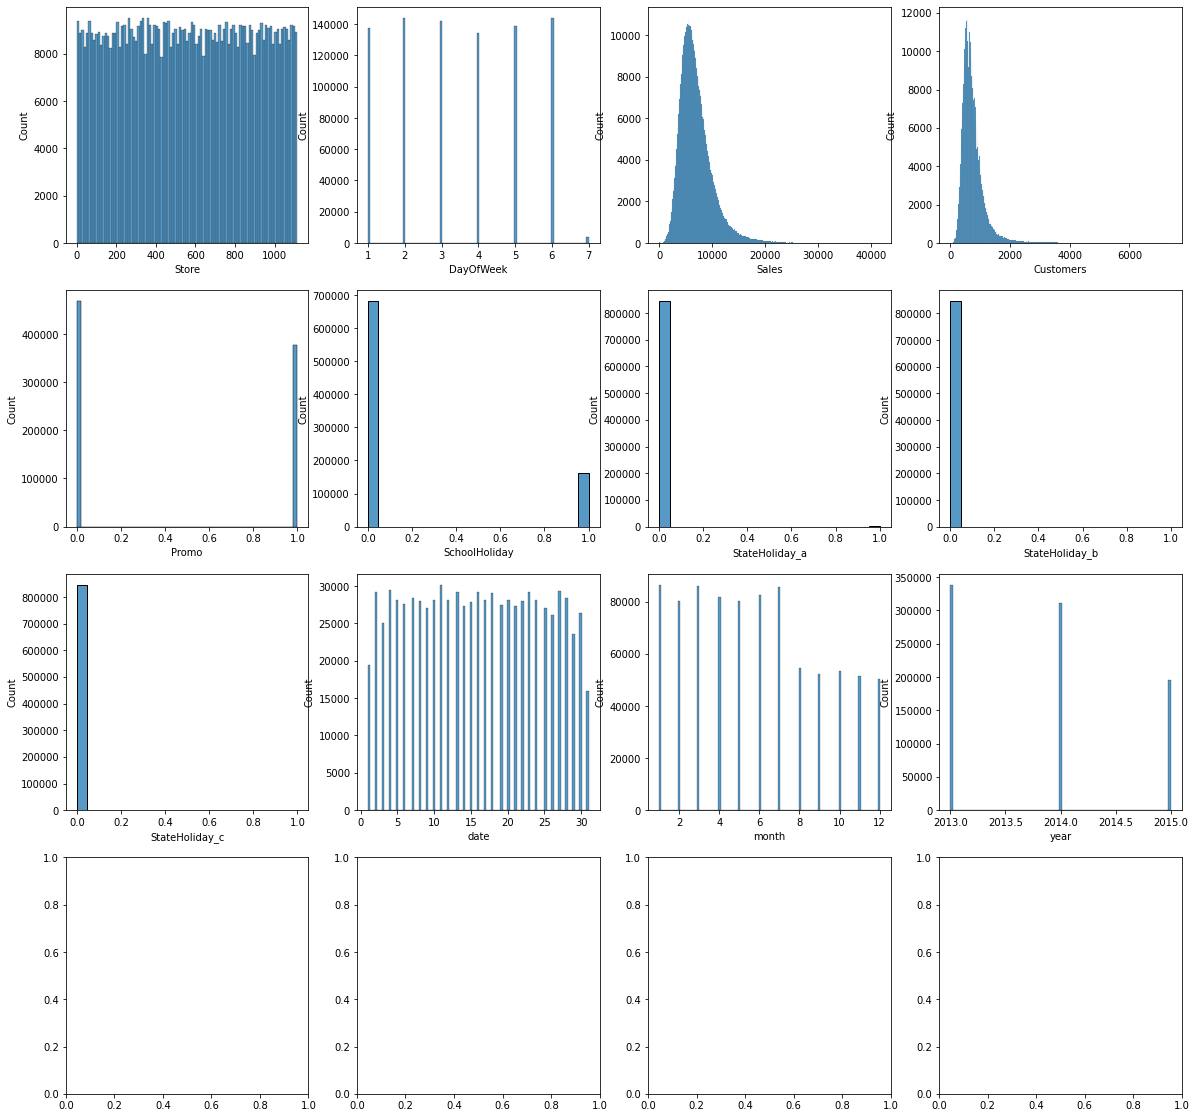

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
for i,col in enumerate(sales_df.describe().columns):
 sns.histplot(sales_df[col],ax=axes[i//4,i%4])

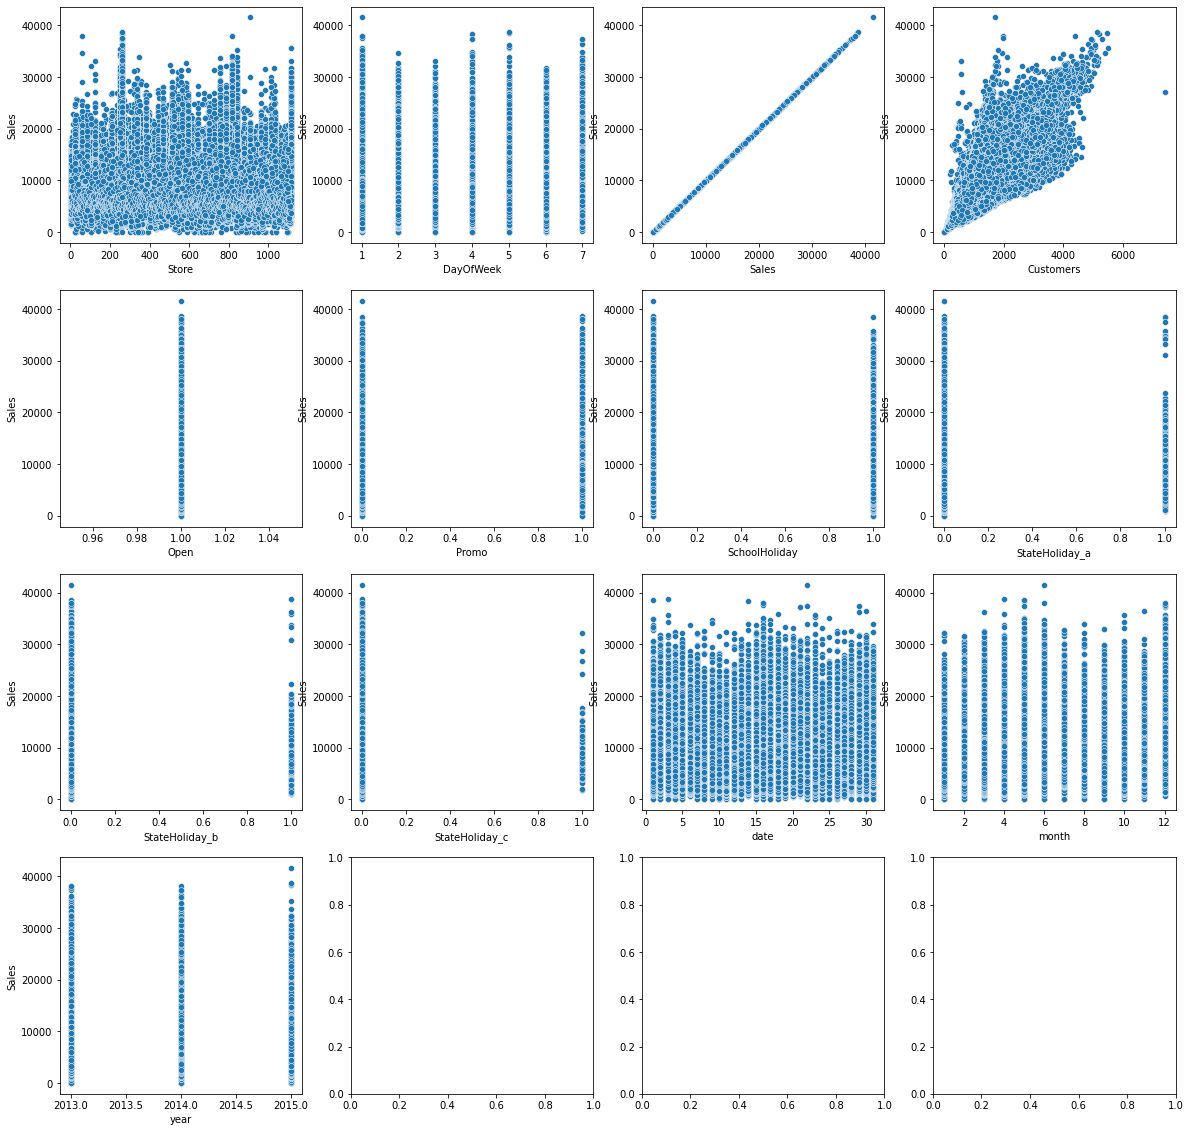

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
for i,col in enumerate(sales_df.describe().columns):
 sns.scatterplot(sales_df[col],sales_df['Sales'],ax=axes[i//4,i%4])

Lets see our other suplementary table Store 

Lets see some sales trend

In [ ]:
#seeing yearly average sales
sales_df.groupby('year')['Sales'].mean()

year
2013    6814.392025
2014    7025.404201
2015    7088.126648
Name: Sales, dtype: float64

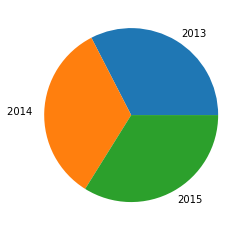

In [ ]:
mylabels = ["2013", "2014 ", "2015"]
plt.pie(sales_df.groupby('year')['Sales'].mean(),labels=mylabels)
plt.show()

In [ ]:
#sales on state holiday


In [ ]:
store_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT REGRESSION/store.csv')

In [ ]:
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
print('NO of rows = '+ str(store_df.shape[0]))
print('NO of columns = '+ str(store_df.shape[1]))

NO of rows = 1115
NO of columns = 10


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


StoreType,Assortment,PromoInterval are object type lets explore them


In [ ]:
# lets see value counts of StoreType
store_df['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [ ]:
#Lets do one hot encoding on column StoreType and convert to (0,1) 
store_df = pd.get_dummies(store_df, columns=["StoreType"],drop_first=True)

In [ ]:
store_df.head(5)

,Store,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_b,StoreType_c,StoreType_d
0,1,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,1,0
1,2,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0
2,3,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0
3,4,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,0,1,0
4,5,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,0,0


In [ ]:
# lets see value count of assortment 
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [ ]:
# one hot encoding on Assortment
store_df=pd.get_dummies(store_df,columns=['Assortment'],drop_first=True)


In [ ]:
store_df

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,1,0,0,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
3,4,620.0,9.0,2009.0,0,NaN,NaN,NaN,0,1,0,0,1
4,5,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
1111,1112,1880.0,4.0,2006.0,0,NaN,NaN,NaN,0,1,0,0,1
1112,1113,9260.0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,1
1113,1114,870.0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,1


In [ ]:
#value counts of PromoInterval
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

Promo Interval has 3 categories so lets do one hot encoding

In [ ]:
store_df=pd.get_dummies(store_df,columns=['PromoInterval'],drop_first=True)

Now lets replace Null(NaN) values


In [ ]:
# Replacing null values with 0
store_df.fillna(0,inplace=True)

In [ ]:
store_df.head(4)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,1,0,0,0,0,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,0,0,0,0,0,1,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,0,0,0,0,0,1,0
3,4,620.0,9.0,2009.0,0,0.0,0.0,0,1,0,0,1,0,0


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5390.358744,4.930942,1370.939013,0.512108,12.083408,1030.239462,0.015247,0.132735,0.312108,0.008072,0.460090,0.300448,0.095067
std,322.01708,7657.973705,4.284924,935.467654,0.500078,15.542241,1006.038782,0.122587,0.339441,0.463561,0.089520,0.498628,0.458659,0.293439
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2320.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Distribution of data in features

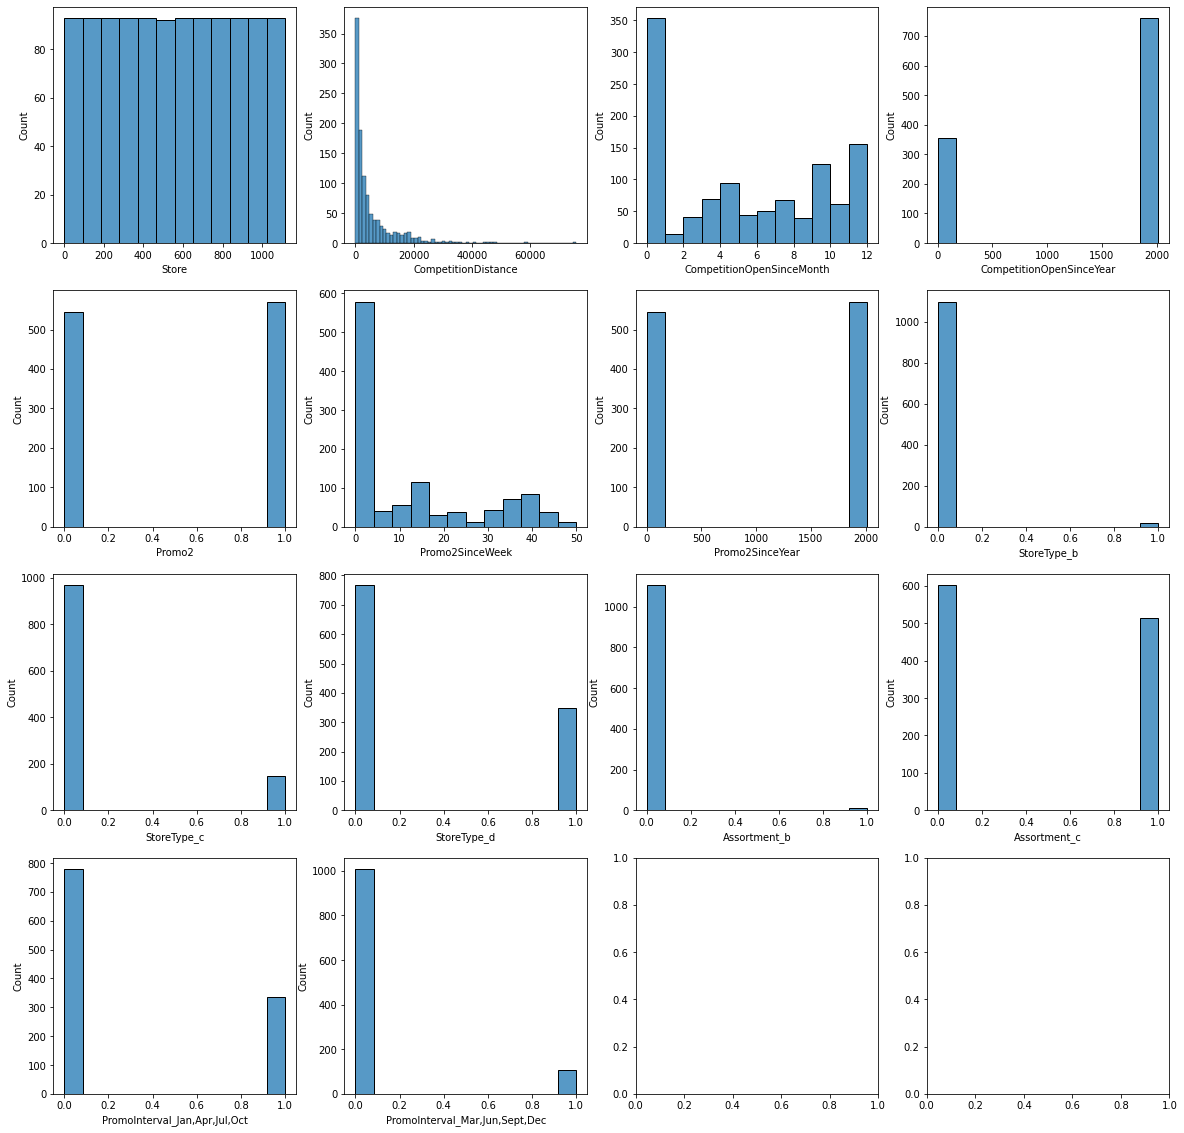

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
for i,col in enumerate(store_df.describe().columns): 
 sns.histplot(store_df[col],ax=axes[i//4,i%4])


Now lets merge both the data frames 

In [ ]:
new_df=sales_df.merge(store_df,how='inner',left_on='Store',right_on='Store')



In [ ]:
new_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'date', 'month', 'year', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

lets see distribution of data

In [ ]:
# fig,axes=plt.subplots(nrows=5,ncols=5,figsize=(20,20))
# for i,col in enumerate(new_df.describe().columns): 
#  sns.histplot(new_df[col],ax=axes[i//5,i%5])

lets see correlation matrix

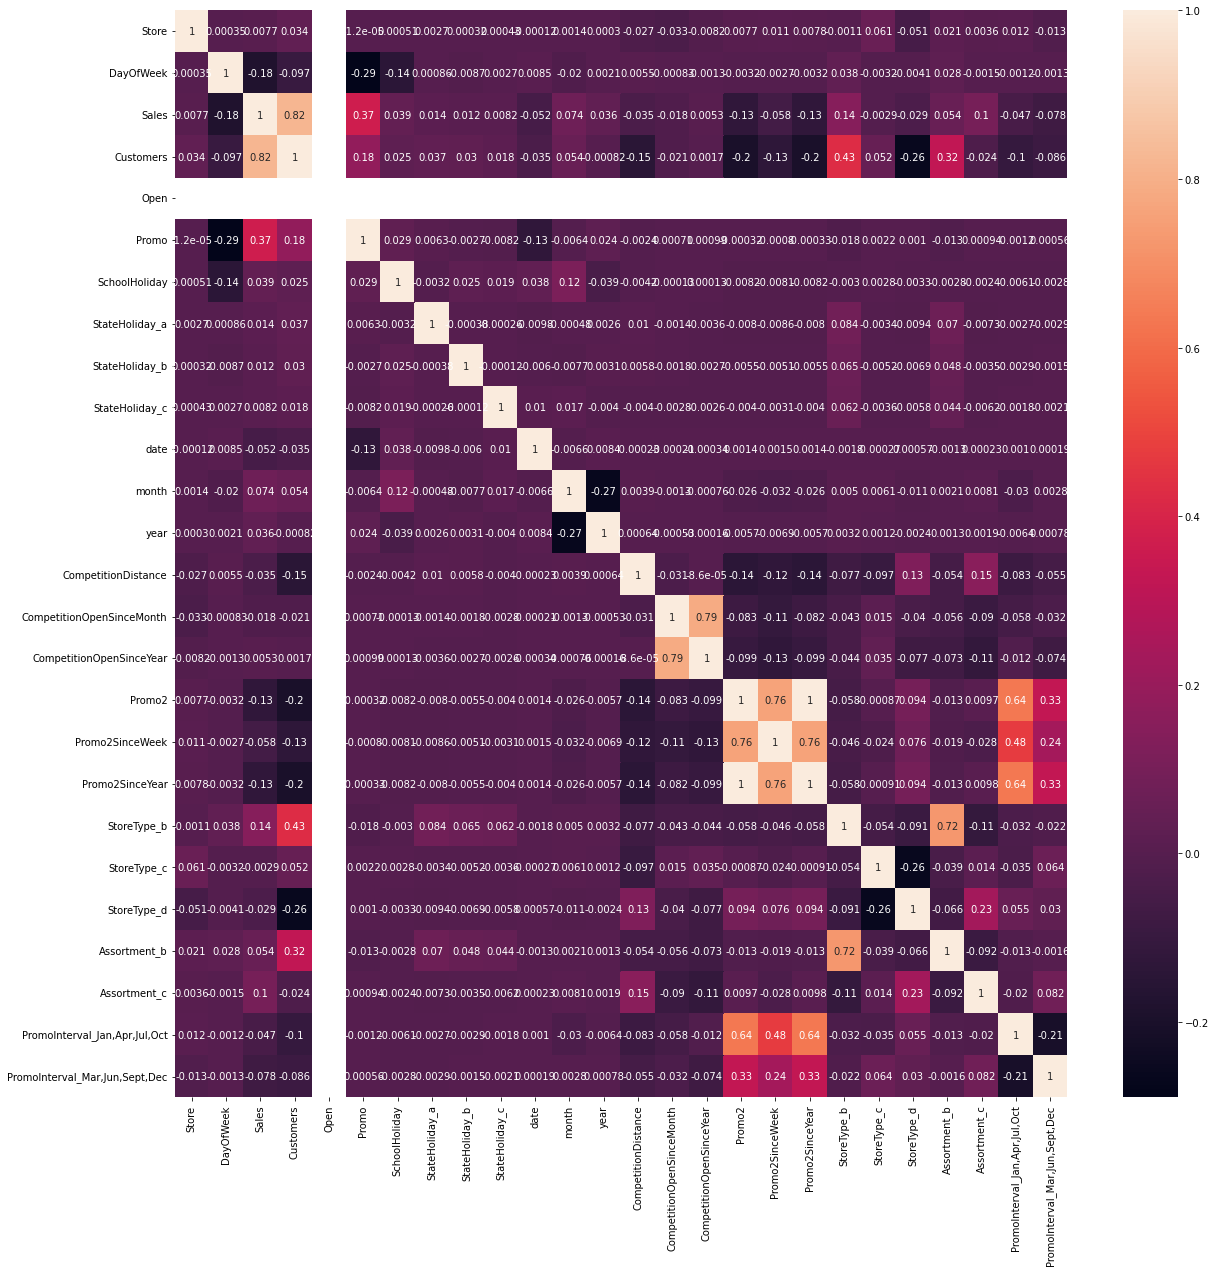

In [ ]:
correlations = new_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

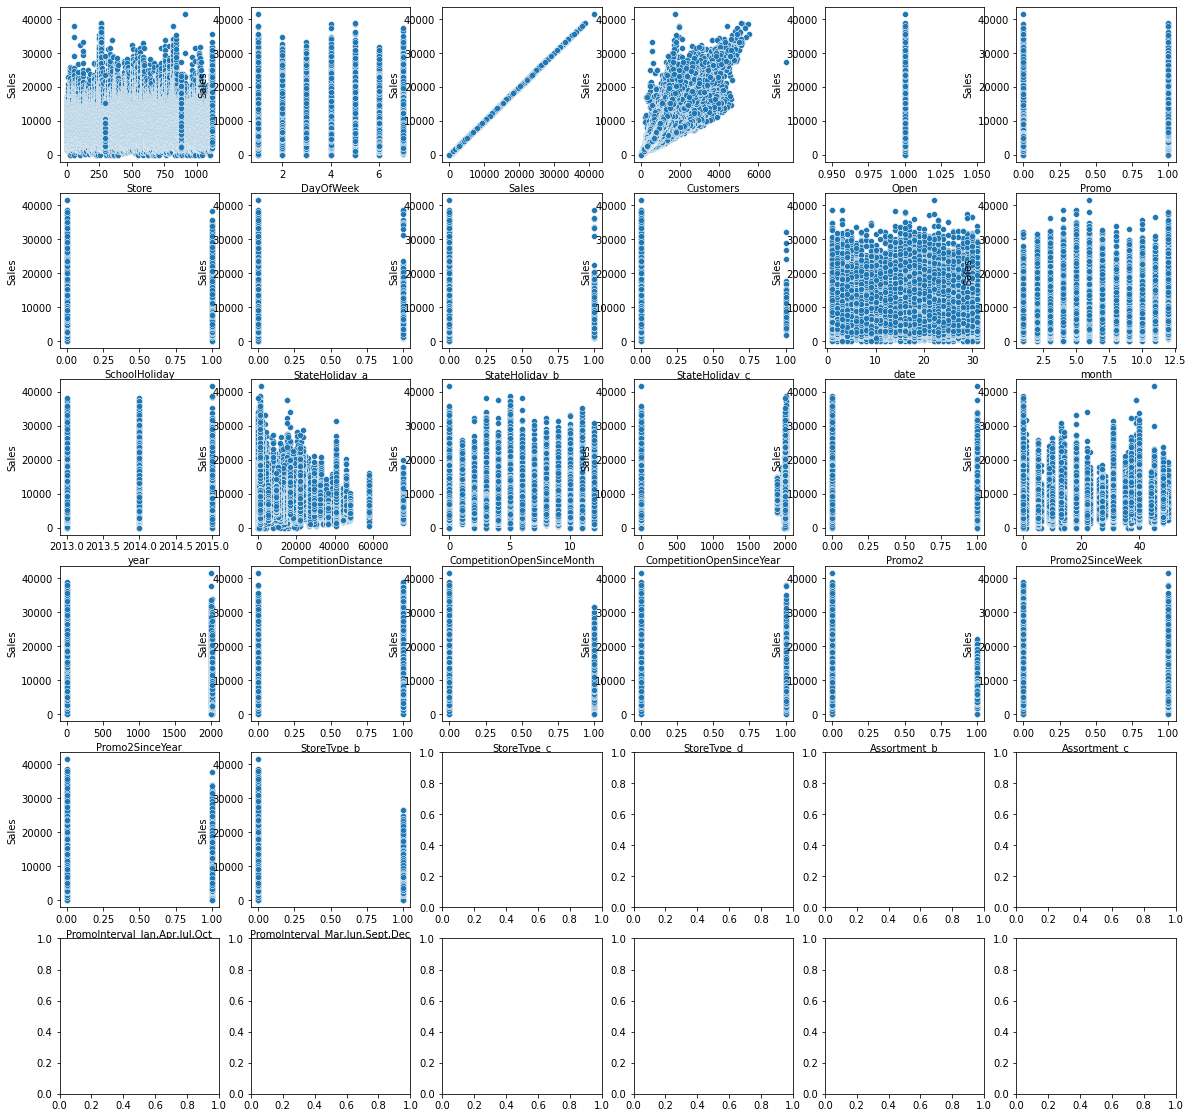

In [ ]:
fig,axes=plt.subplots(nrows=6,ncols=6,figsize=(20,20))
for i,col in enumerate(new_df.describe().columns):
 sns.scatterplot(new_df[col],new_df['Sales'],ax=axes[i//6,i%6])

Now lets divide dependent var and independent var

In [ ]:
#storing dependent variables in 
y=new_df['Sales']

In [ ]:
#storing independent variables in X
new_df.drop(columns=['Sales'],axis=1,inplace=True)

In [ ]:
x=new_df

In [ ]:
x

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,date,...,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,555,1,1,1,0,0,0,31,...,0,0.0,0.0,0,1,0,0,0,0,0
1,1,4,546,1,1,1,0,0,0,30,...,0,0.0,0.0,0,1,0,0,0,0,0
2,1,3,523,1,1,1,0,0,0,29,...,0,0.0,0.0,0,1,0,0,0,0,0
3,1,2,560,1,1,1,0,0,0,28,...,0,0.0,0.0,0,1,0,0,0,0,0
4,1,1,612,1,1,1,0,0,0,27,...,0,0.0,0.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,1002,1,1,0,0,0,0,7,...,0,0.0,0.0,0,0,0,0,0,0,0
844388,292,6,340,1,0,0,0,0,0,5,...,0,0.0,0.0,0,0,0,0,0,0,0
844389,292,5,560,1,0,1,0,0,0,4,...,0,0.0,0.0,0,0,0,0,0,0,0
844390,292,4,662,1,0,1,0,0,0,3,...,0,0.0,0.0,0,0,0,0,0,0,0


Now lets split the data in training and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

**Now let us use some models and finds which model is fitting with data**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.3 MB/s 


In [ ]:

from skopt import BayesSearchCV

Let us implement Linear regression 


In [ ]:
transform=MinMaxScaler()
transform.fit(x_test)
transform.fit(x_train)

MinMaxScaler()

In [ ]:
LR=LinesrRegression()
parameters={'alpha':[1e-3,1e-2,1e-1,1,5,10,15,20,25]}
lasso_regressor=BayesSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=4)#hyperparameter tunning and cross validation
lasso_regressor.fit(x_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
LR=LinearRegression()
parameters={'alpha':[1e-3,1e-2,1e-1,1,5,10,15,20,25]}
linear_regressor=RandomizedSearchCV(LR,parameters,scoring='neg_mean_squared_error',cv=4)#hyperparameter tunning and cross validation
linear_regressor.fit(x_train,y_train)

In [ ]:
y_predict=lasso_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import math
math.sqrt(mean_squared_error(y_test,y_predict))#error is also considerable

In [ ]:

sns.distplot((y_test),color='red')


In [ ]:

sns.distplot((y_predict),color='red')

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)


Let us Implement regresion through decision trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


In [ ]:
RD=RandomForestClassifier()
